#### Intro :

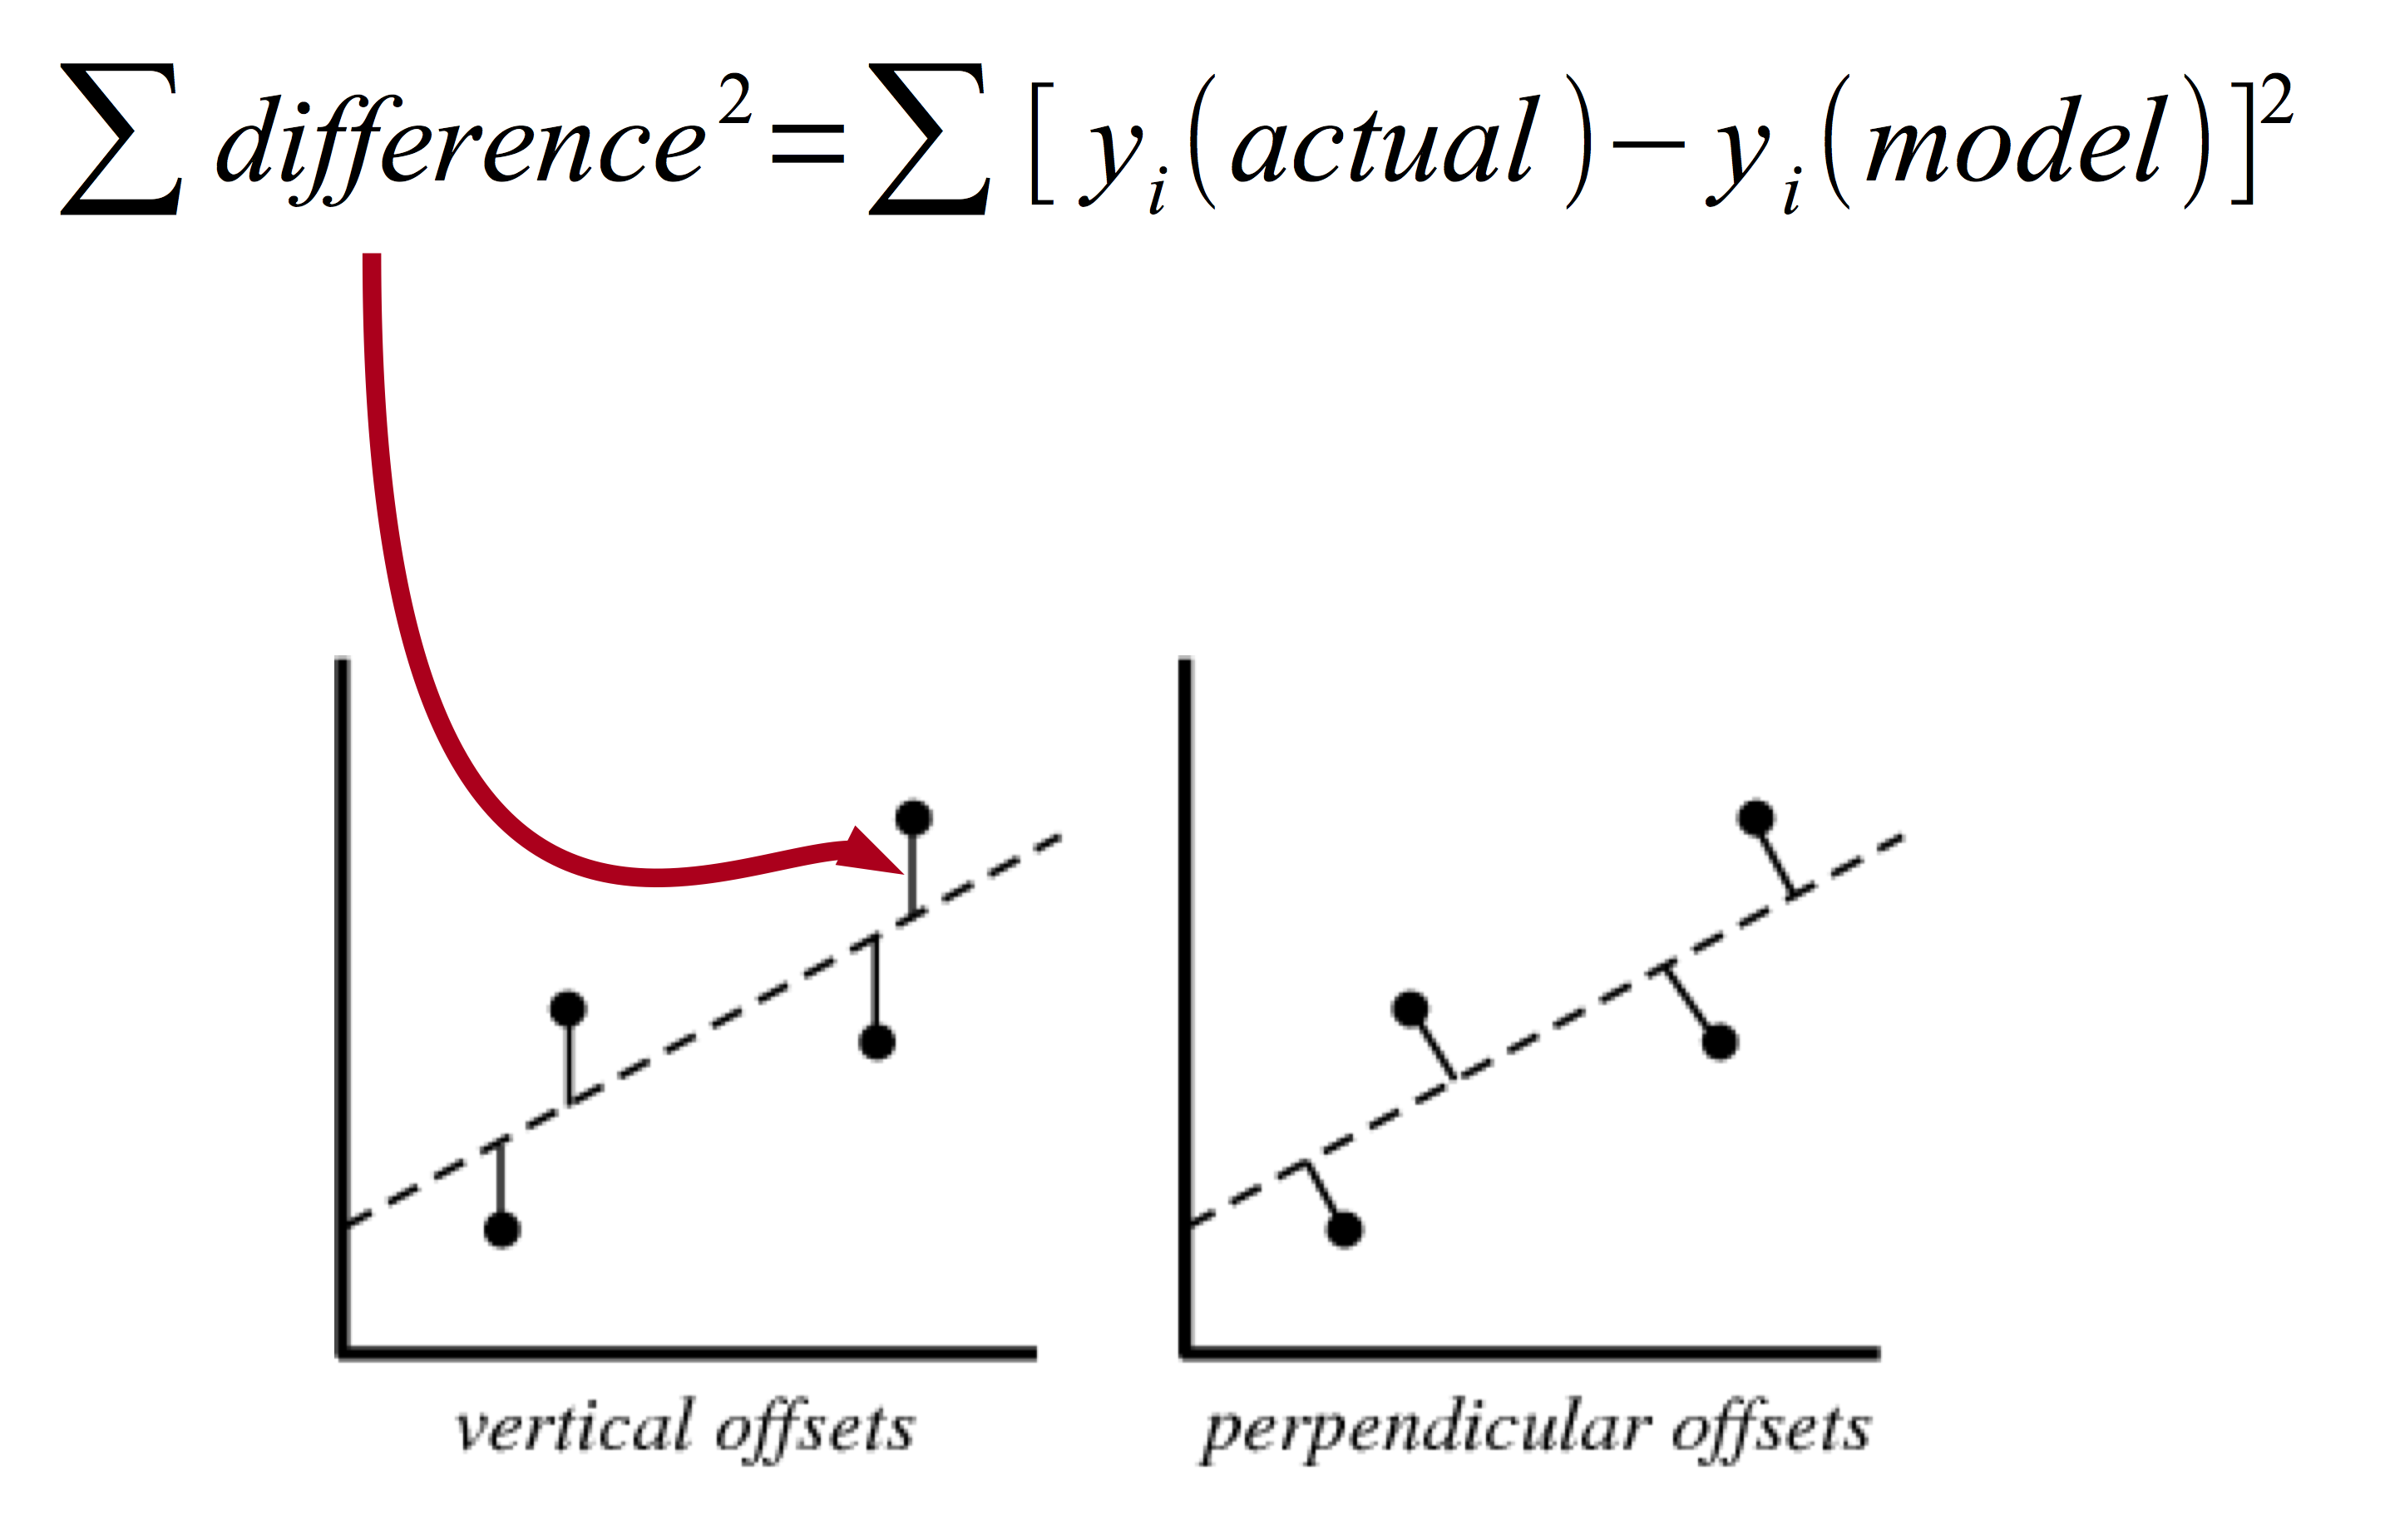

In [1]:
from IPython.display import Image
Image(filename='minimize.png', width=500, height=500) 

### LMFIT package:  
https://lmfit.github.io/lmfit-py/index.html

### Example :

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x= np.array([0.,1.,2.,3.])
data = np.array([1.3,1.8,5.,10.7])

Lets visualize how a quadratic curve fits to it:

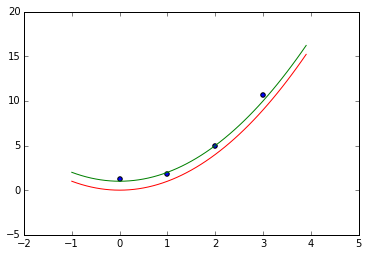

In [4]:
plt.scatter(x,data)
xarray=np.arange(-1,4,0.1)
plt.plot(xarray, xarray**2,'r-')  # Not the best fit
plt.plot(xarray, xarray**2+1,'g-')

Lets build a general quadratic model:

In [5]:
def get_residual(vars,x, data):
    a= vars[0]
    b=vars[1]
    model =a* x**2 +b
    return data-model

In [6]:
vars=[1.,0.]
print get_residual(vars,x,data)
print sum(get_residual(vars,x,data))

[ 1.3  0.8  1.   1.7]
4.8


In [7]:
vars=[1.,1.]
print sum(get_residual(vars,x,data))

0.8


In [8]:
vars=[2.,0.]
print sum(get_residual(vars,x,data))

-9.2


### Questions ?

#### **leastsq** function from scipy:

In [9]:
from scipy.optimize import leastsq
vars = [0.,0.]
out = leastsq(get_residual, vars, args=(x, data))
print out

(array([ 1.06734694,  0.96428571]), 2)


In [10]:
vars=[1.06734694,  0.96428571]
print sum(get_residual(vars,x,data)**2)

0.237755102041


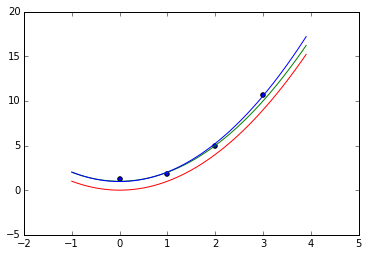

In [12]:
vars=[1.06734694,  0.96428571]
plt.scatter(x,data)
xarray=np.arange(-1,4,0.1)
plt.plot(xarray, xarray**2,'r-')
plt.plot(xarray, xarray**2+1,'g-')
fitted = vars[0]* xarray**2 +vars[1]
plt.plot(xarray, fitted,'b-')


### LMFIT :


1. Using Parameter objects instead of plain floats as variables. A parameter value:
  * can be varied in the fit
  * have a fixed value
  * have upper and/or lower bounds
  * **constrained by an algebraic expression of other Parameter values**
2. Ease of changing fitting algorithms. Once a fitting model is set up, one can change the fitting algorithm used to find the optimal solution **without changing the objective function**.

3. Improved estimation of confidence intervals. While **scipy.optimize.leastsq()** will automatically calculate uncertainties and correlations from the covariance matrix, the accuracy of these estimates are often questionable. To help address this, lmfit has functions to **explicitly explore** parameter space to determine confidence levels even for the most difficult cases.

4. Improved curve-fitting with the Model class. This extends the capabilities of scipy.optimize.curve_fit(), allowing you to **turn a function that models for your data into a python class** that helps you parametrize and fit data with that model.

5. Many **pre-built** models for common lineshapes are included and ready to use.




### minimize & Parameters:

In [13]:
from lmfit import minimize, Parameters

params = Parameters()
params.add('amp', value=0.)
params.add('offset', value=0.)

def get_residual(params,x, data):
    amp= params['amp'].value
    offset=params['offset'].value
    
    model =amp* x**2 +offset
    
    return data-model

out = minimize(get_residual, params, args=(x, data))

In [14]:
dir(out)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'aborted',
 'aic',
 'bic',
 'chisqr',
 'covar',
 'errorbars',
 'ier',
 'init_vals',
 'lmdif_message',
 'message',
 'ndata',
 'nfev',
 'nfree',
 'nvarys',
 'params',
 'redchi',
 'residual',
 'success',
 'var_names']

In [121]:
out.params 

Parameters([('amp', <Parameter 'amp', value=1.0673469387778385 +/- 0.0493, bounds=[-inf:inf]>), ('offset', <Parameter 'offset', value=0.96428572865679441 +/- 0.244, bounds=[-inf:inf]>)])

In [122]:
dir(out.params)

['_OrderedDict__map',
 '_OrderedDict__marker',
 '_OrderedDict__root',
 '_OrderedDict__update',
 '__add__',
 '__class__',
 '__cmp__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_asteval',
 'add',
 'add_many',
 'clear',
 'copy',
 'dump',
 'dumps',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'load',
 'loads',
 'pop',
 'popitem',
 'pretty_print',
 'pretty_repr',
 'setdefault',
 'update',
 'update_constraints',
 'values',
 'valuesdict',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [125]:
out.params.values

<bound method Parameters.values of Parameters([('amp', <Parameter 'amp', value=1.0673469387778385 +/- 0.0493, bounds=[-inf:inf]>), ('offset', <Parameter 'offset', value=0.96428572865679441 +/- 0.244, bounds=[-inf:inf]>)])>

### Fit values are the same as before !

In [126]:
out.__dict__

{'aborted': False,
 'aic': -4.5186451946354484,
 'bic': -5.7460564723956669,
 'chisqr': 0.23775510204081643,
 'covar': array([[ 0.00242607, -0.00849125],
        [-0.00849125,  0.05943877]]),
 'errorbars': True,
 'ier': 4,
 'init_vals': [0.0, 0.0],
 'lmdif_message': 'The cosine of the angle between func(x) and any column of the\n  Jacobian is at most 0.000000 in absolute value',
 'message': 'Tolerance seems to be too small.',
 'ndata': 4,
 'nfev': 8,
 'nfree': 2,
 'nvarys': 2,
 'params': Parameters([('amp', <Parameter 'amp', value=1.0673469387778385 +/- 0.0493, bounds=[-inf:inf]>), ('offset', <Parameter 'offset', value=0.96428572865679441 +/- 0.244, bounds=[-inf:inf]>)]),
 'redchi': 0.11887755102040821,
 'residual': array([ 0.33571429, -0.23163265, -0.23367347,  0.12959184]),
 'success': True,
 'var_names': ['amp', 'offset']}

In [132]:
out.params['amp'].__dict__ 

{'_delay_asteval': False,
 '_expr': None,
 '_expr_ast': None,
 '_expr_deps': [],
 '_expr_eval': <lmfit.asteval.Interpreter instance at 0x10a8e15a8>,
 '_val': 1.0673469387778385,
 'correl': {'offset': -0.70710678472415456},
 'from_internal': <function lmfit.parameter.<lambda>>,
 'init_value': 0.0,
 'max': inf,
 'min': -inf,
 'name': 'amp',
 'stderr': 0.0492551770831514,
 'user_value': 0.0,
 'vary': True}

## Questions ?

### Manipulating parameters :
**parameter** class gives a lot of flexibility in manipulating the model parameters !

In [15]:
params['amp'].vary = False

In [16]:
out = minimize(get_residual, params, args=(x, data))

In [17]:
print out.params

Parameters([('amp', <Parameter 'amp', value=0.0 (fixed), bounds=[-inf:inf]>), ('offset', <Parameter 'offset', value=4.7000000700457081 +/- 2.16, bounds=[-inf:inf]>)])


In [18]:
print out.chisqr

56.06


In [19]:
params['amp'].value = 1.0673469387778385

In [20]:
out = minimize(get_residual, params, args=(x, data))
print out.chisqr

0.237755102041


### Another way of defining the parameters :

In [21]:
def get_residual(params,x, data):
    #amp= params['amp'].value
    #offset=params['offset'].value
    #xoffset=params['xoffset'].value    
    
    parvals = params.valuesdict()
    amp = parvals['amp']
    offset = parvals['offset']

    
    model =amp* x**2 +offset
    
    return data-model

### Other manipulations :

In [22]:
params = Parameters()
params.add('amp', value=0.)
#params['amp'] = Parameter(value=..., min=...)

params.add('offset', value=0.)
params.add('xoffset', value=0.0, vary=False)


out = minimize(get_residual, params, args=(x, data))


In [23]:
print out.params

Parameters([('amp', <Parameter 'amp', value=1.0673469387778385 +/- 0.0493, bounds=[-inf:inf]>), ('offset', <Parameter 'offset', value=0.96428572865679441 +/- 0.244, bounds=[-inf:inf]>), ('xoffset', <Parameter 'xoffset', value=0.0 (fixed), bounds=[None:None]>)])


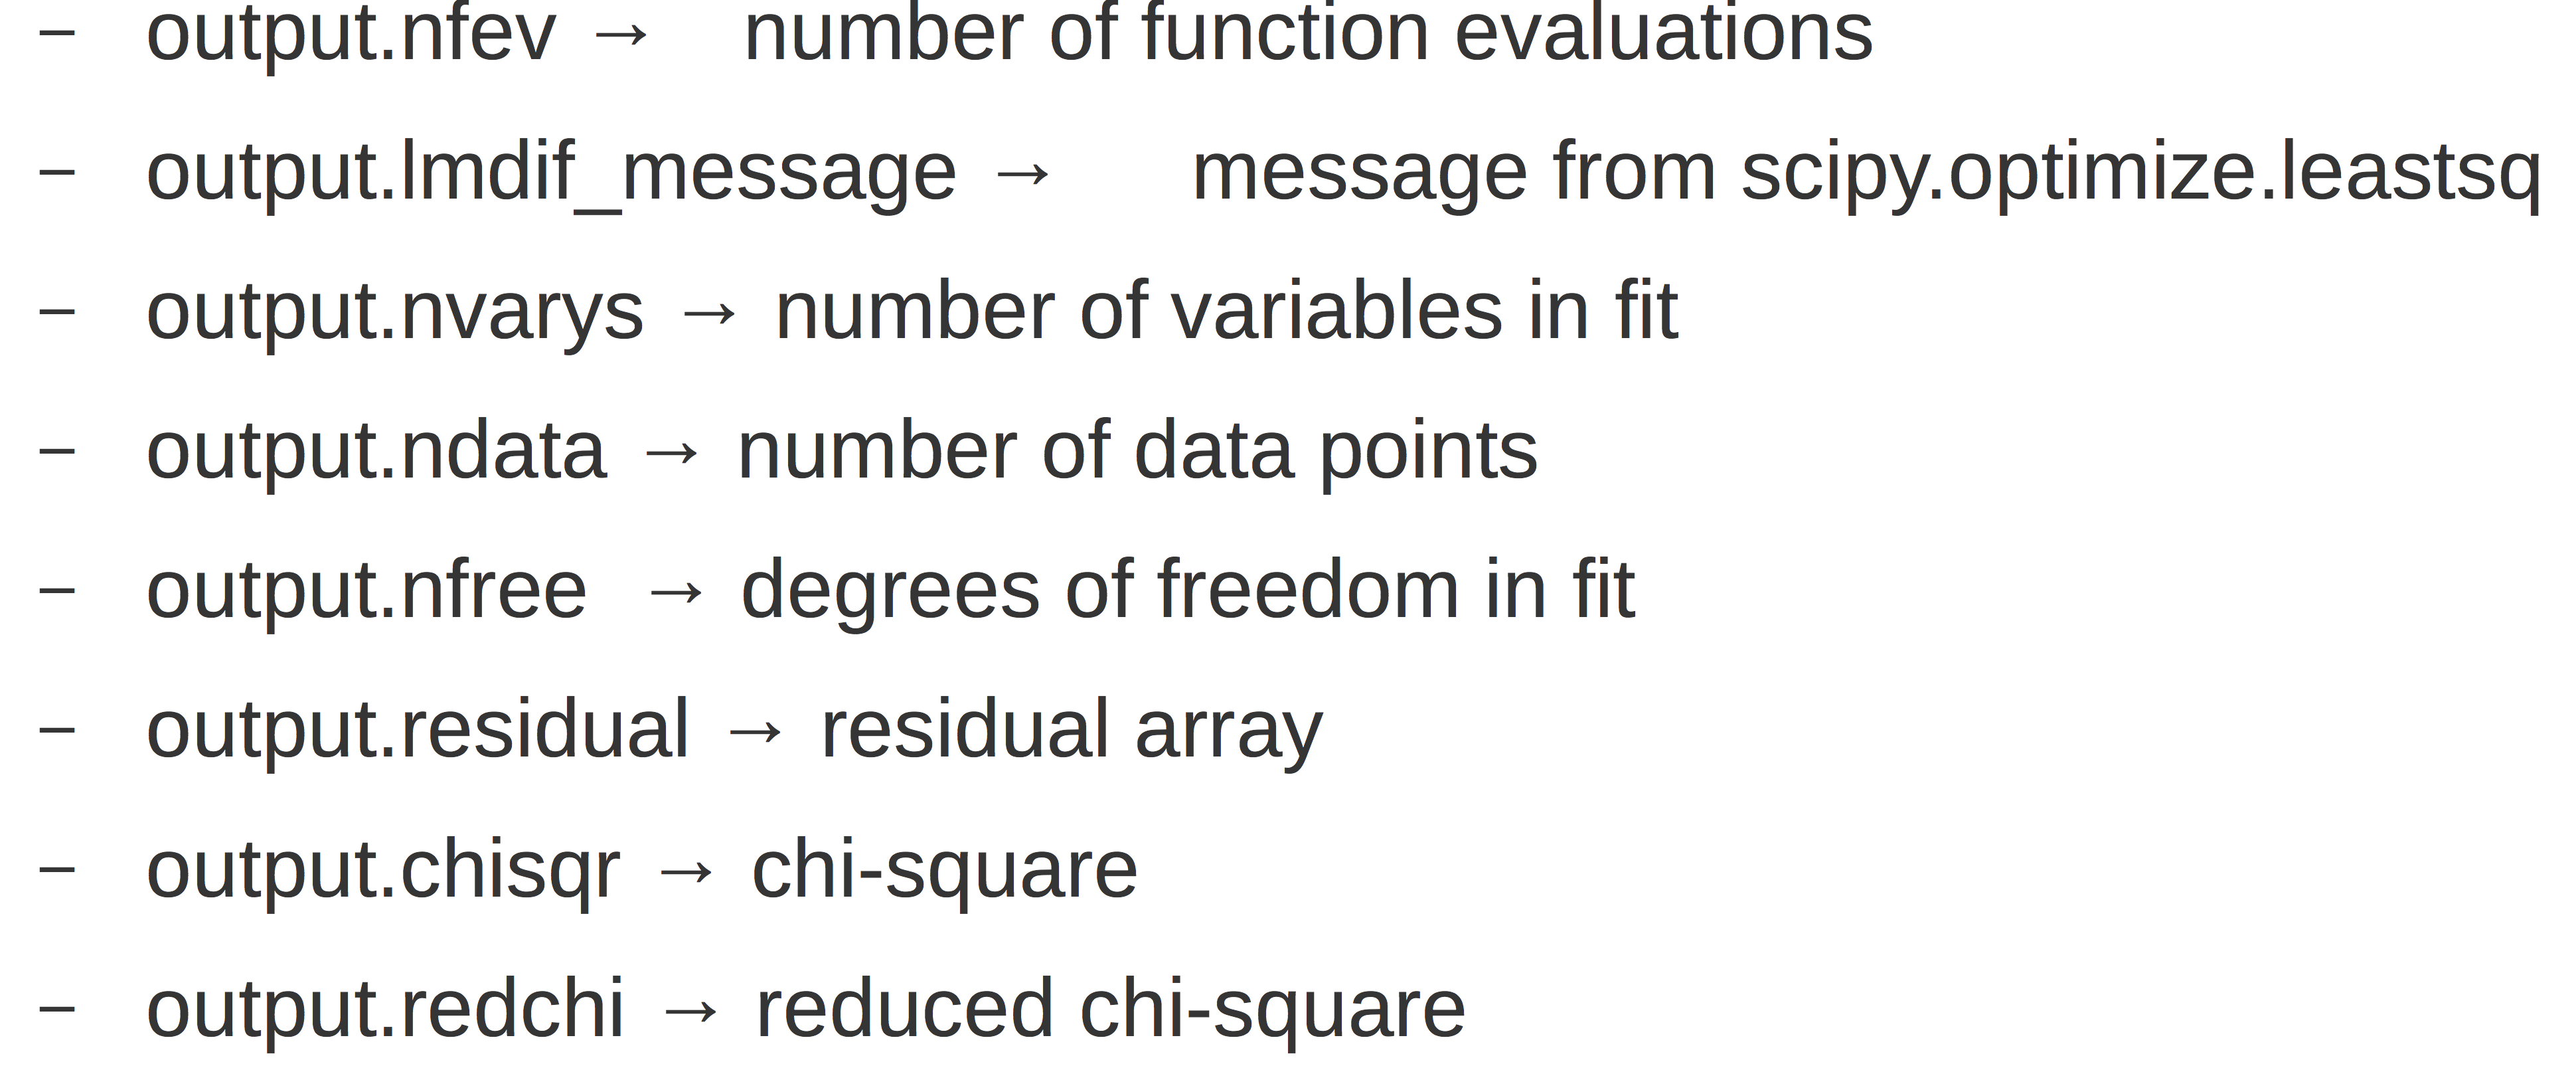

In [24]:
Image(filename='output.png', width=500, height=500) 

### Challenge : Set parameter bound for 'amp' using "min" and "max"

In [25]:
params['offset'].min = -10.
params['offset'].max = 10.

In [26]:
out = minimize(get_residual, params, args=(x, data))
print out.params

Parameters([('amp', <Parameter 'amp', value=1.0673469388045833 +/- 0.0493, bounds=[-inf:inf]>), ('offset', <Parameter 'offset', value=0.96428571770987048 +/- 0.244, bounds=[-10.0:10.0]>), ('xoffset', <Parameter 'xoffset', value=0.0 (fixed), bounds=[None:None]>)])


### stderr:

In [27]:
print out.params['amp'].stderr

0.0492551768941


### correl:

In [28]:
print out.params['amp'].correl

{'offset': -0.70710678199241461}


### report_fit: For a better report :

In [29]:
from lmfit import minimize, Parameters, Parameter, report_fit
result = minimize(get_residual, params, args=(x, data))

In [31]:
help(report_fit)

Help on function report_fit in module lmfit.printfuncs:

report_fit(params, **kws)
    print a report for fitted params:  see error_report()



In [32]:
# write error report
report_fit(result.params)


[[Variables]]
    amp:       1.06734693 +/- 0.049255 (4.61%) (init= 0)
    offset:    0.96428571 +/- 0.243800 (25.28%) (init= 0)
    xoffset:   0 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, offset)               = -0.707 


### Choosing Different Fitting Methods :

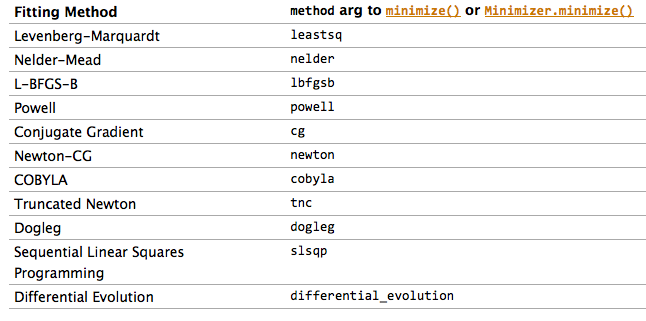

In [21]:
Image(filename='fitting.png', width=500, height=500) 

## Challenge : Run with two other methods e.g., 'tnc' and 'powell' and compare the results:

In [33]:
result2 = minimize(get_residual, params, args=(x, data), method='tnc')
report_fit(result2.params)

[[Variables]]
    amp:       1.06734693 (init= 0)
    offset:    0.96428562 (init= 0)
    xoffset:   0 (fixed)
[[Correlations]] (unreported correlations are <  0.100)


In [34]:
result3 = minimize(get_residual, params, args=(x, data), method='powell')
report_fit(result3.params)

[[Variables]]
    amp:       1.06734698 (init= 0)
    offset:    0.96428559 (init= 0)
    xoffset:   0 (fixed)
[[Correlations]] (unreported correlations are <  0.100)


### Complete report :

In [35]:
print(report_fit(result3))

[[Fit Statistics]]
    # function evals   = 72
    # data points      = 4
    # variables        = 2
    chi-square         = 0.238
    reduced chi-square = 0.119
[[Variables]]
    amp:       1.06734698 (init= 0)
    offset:    0.96428559 (init= 0)
    xoffset:   0 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
None


### Using expressions:

In [36]:
params.add('amp2',     expr='(amp-offset)**2')

def get_residual(params,x, data):
    #amp= params['amp'].value
    #offset=params['offset'].value
    #xoffset=params['xoffset'].value    
    
    parvals = params.valuesdict()
    amp = parvals['amp']
    offset = parvals['offset']
    amp2 = parvals['amp2']

    
    model =amp* x**2 + amp2*x**4 +offset
    
    return data-model

In [37]:
result4 = minimize(get_residual, params, args=(x, data))
report_fit(result4.params)

[[Variables]]
    amp:       1.00887239 +/- 0.061667 (6.11%) (init= 0)
    offset:    0.91788668 +/- 0.109563 (11.94%) (init= 0)
    xoffset:   0 (fixed)
    amp2:      0.00827839 +/- 0.009183 (110.93%)  == '(amp-offset)**2'
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, offset)               =  0.981 
